In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
kospi_df = pd.read_csv('./data/kospi 50 Historical Data.csv')

kospi_df

,Date,Price,Open,High,Low,Vol.,Change %
0,01/01/2025,"2,336.56","2,210.44","2,363.58","2,193.71",599.58M,5.57%
1,12/01/2024,"2,213.32","2,291.72","2,325.58","2,195.90",1.24B,-2.47%
2,11/01/2024,"2,269.46","2,333.98","2,389.52","2,190.40",1.39B,-3.20%
3,10/01/2024,"2,344.58","2,358.12","2,438.43","2,344.58",1.30B,-1.70%
4,09/01/2024,"2,385.16","2,504.14","2,517.30","2,299.68",1.20B,-4.48%
...,...,...,...,...,...,...,...
252,01/01/2004,805.18,756.35,831.15,754.15,2.01M,7.17%
253,12/01/2003,751.31,744.69,765.08,715.06,2.18M,0.80%
254,11/01/2003,745.36,737.71,769.44,702.28,2.26M,1.12%
255,10/01/2003,737.13,643.01,750.47,641.01,2.60M,13.55%


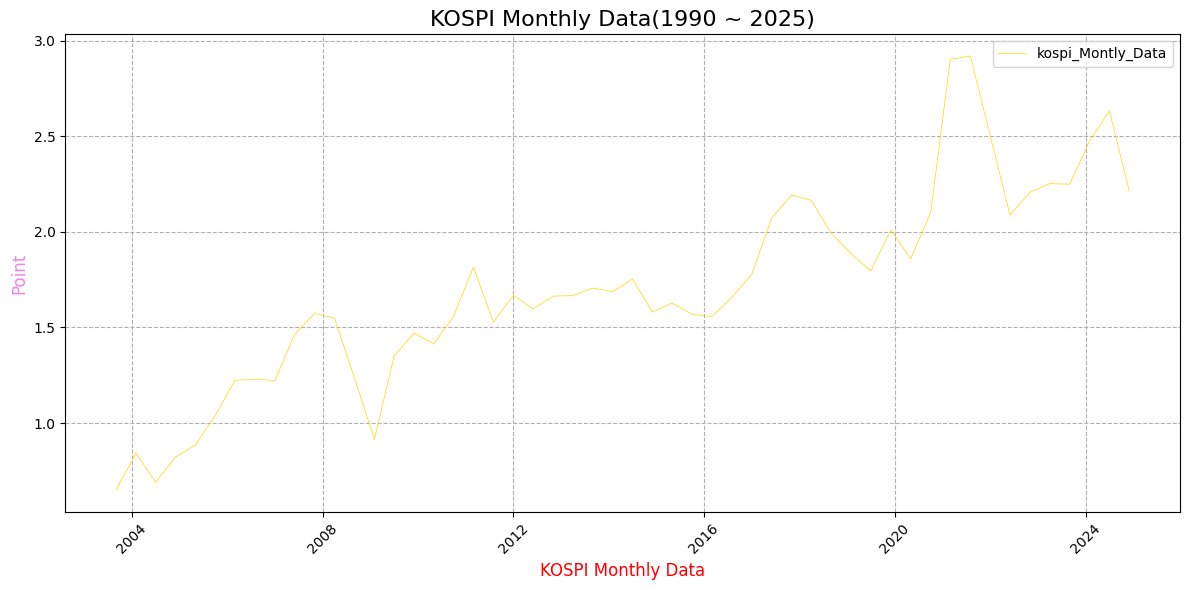

In [3]:
kospi_df.drop(columns=['Vol.'])
kospi_df['Date'] = pd.to_datetime(kospi_df['Date'])

# 데이터 필요 없는 부분 제거
if kospi_df['High'].dtype == 'object':
    kospi_df['High'] = kospi_df['High'].str.replace(',', '').astype(float).astype(int)

if kospi_df['Low'].dtype == 'object':
    kospi_df['Low'] = kospi_df['Low'].str.replace(',', '').astype(float).astype(int)

if kospi_df['Price'].dtype == 'object':
    kospi_df['Price'] = kospi_df['Price'].str.replace(',', '').astype(float).astype(int)

if kospi_df['Open'].dtype == 'object':
    kospi_df['Open'] = kospi_df['Open'].str.replace(',', '').astype(float).astype(int)

# High와 Low의 평균
kospi_df['Avg'] = (kospi_df['High'] + kospi_df['Low']) / 2

kospi_df['Price'] = kospi_df['Price'] / 1000


# 날짜 기준으로 데이터 정렬
df = kospi_df.sort_values('Date')

# 너무 갯수가 많아서 보기 불편 하기에 표현 개수 조절
sampled_df = df.iloc[::5]
# 차트 생성
plt.figure(figsize=(12, 6))
plt.plot(sampled_df['Date'], sampled_df['Price'], label='kospi_Montly_Data', linestyle='-', linewidth= 0.5, color = 'gold')


# 시각적 요소 개선
plt.title('KOSPI Monthly Data(1990 ~ 2025)', fontsize =16)
plt.xlabel('KOSPI Monthly Data', fontsize=12, color = 'red') 
plt.ylabel('Point', fontsize=12, color = 'VIOLET')
plt.legend(fontsize=10)
plt.grid(linestyle='--')
plt.xticks(rotation=45)
plt.tight_layout()

# 차트 출력
plt.show()